In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [13]:
# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
citydata_df.head()

ridedata_df = pd.read_csv(ride_data_to_load)
ridedata_df.head()

# Combine the data into a single dataset
mergedata_df = pd.merge(citydata_df, ridedata_df)

# Display the data table for preview
mergedata_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [39]:
# Bubble Scatter Plot Calculations
groupdata = mergedata_df
avgfare = groupdata["fare"].mean()
totalrides = groupdata["ride_id"].count()
drivercount = groupdata["driver_count"].sum()
totaldriver = (drivercount // totalrides)

typedata = citydata_df.groupby("type")

scatterdata = pd.DataFrame({"AverageFare": [avgfare],
                        "TotalRides": [totalrides],
                        "TotalDrivers": [totaldriver]})

scatterdata["AverageFare"] = scatterdata["AverageFare"].round(2)

# Type_df
urbandata = mergedata_df.loc[mergedata_df["type"] == "Urban", :]
suburbandata = mergedata_df.loc[mergedata_df["type"] == "Suburban", :]
ruraldata = mergedata_df.loc[mergedata_df["type"] == "Rural"]

# CityName_df
groupurban = urbandata.groupby("city")
groupsub = suburbandata.groupby("city")
grouprural = ruraldata.groupby("city")

# Urban Data Analysis
urbanfare = groupurban["fare"].mean()
urbanrides = groupurban["ride_id"].count()
urbancount = groupurban["driver_count"].sum()
urbandrivers = (urbancount // urbanrides)

# Suburban Data Analysis
subfare = groupsub["fare"].mean()
subrides = groupsub["ride_id"].count()
subcount = groupsub["driver_count"].sum()
subdrivers = (subcount // subrides)

# Rural Data Analysis
ruralfare = grouprural["fare"].mean()
ruralrides = grouprural["ride_id"].count()
ruralcount = grouprural["driver_count"].sum()
ruraldrivers = (ruralcount // ruralrides)


# Plot_df
urbdat = pd.DataFrame({"AverageFare": urbanfare,
                       "TotalRides": urbanrides,
                       "TotalDrivers": urbandrivers})
urbdat["AverageFare"] = urbdat["AverageFare"].round(2)

subdat = pd.DataFrame({"AverageFare": subfare,
                     "TotalRides": subrides,
                     "TotalDrivers": subdrivers})
subdat["AverageFare"] = subdat["AverageFare"].round(2)

rurdat = pd.DataFrame({"AverageFare": ruralfare,
                       "TotalRides": ruralrides,
                       "TotalDrivers": ruraldrivers})
rurdat["AverageFare"] = rurdat["AverageFare"].round(2)

# Incorporate the other graph properties
ChangeBubbleSize = 10
CBS = ChangeBubbleSize
plt.figure(figsize=(8,6))

# Urban Scatter Plot Properties
bubbleurb = plt.scatter(urbdat.TotalRides, urbdat.AverageFare, c="LightCoral", label = "Urban", 
                    s=(urbdat.TotalDrivers * CBS), alpha = 0.7, edgecolor = "black", linewidths = .6)

# Suburban Scatter Plot Properties
bubblesub = plt.scatter(subdat.TotalRides, subdat.AverageFare, c="LightSkyBlue", label = "Suburban", 
                    s=(subdat.TotalDrivers * CBS), alpha = 0.7, edgecolor = "black", linewidths = .9)

# Rural Scatter Plot Properties
bubblerur = plt.scatter(rurdat.TotalRides, rurdat.AverageFare, c="gold", label = "Rural", 
                    s=(rurdat.TotalDrivers * CBS), alpha = 0.6, edgecolor = "black", linewidths = 1)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(.50, .5 "Note:\nCircle size correlates with driver count per city.", fontsize=12)

# Save Figure
plt.savefig("analysis/Fig1.png")

SyntaxError: invalid syntax (<ipython-input-39-c6ec97ad4549>, line 92)

In [ ]:
# Show plot
plt.grid()
plt.show()

## Total Fares by City Type

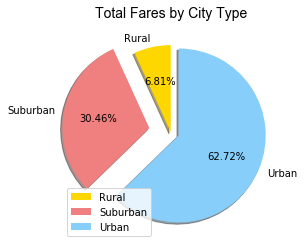

In [29]:
# create dataframe
fareByCity_df = pd.DataFrame(mergedata_df.groupby(by='type')['fare'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.25, .1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90,\
        colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Fares by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

In [ ]:
# Show Figure
plt.show()

# Total Drivers by City Type

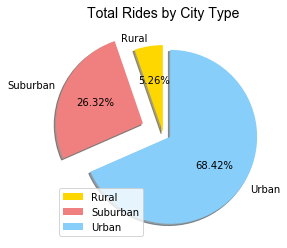

In [28]:
# create dataframe
ridesByCity_df = pd.DataFrame(mergedata_df.groupby(by='type')['ride_id'].count())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]
explode = (0, 0.25, .1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%',\
        startangle=90, colors=colors, explode=explode, shadow=True)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Rides by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

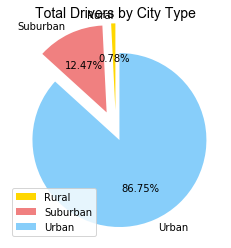

In [27]:
# create dataframe
driversByCity_df = pd.DataFrame(mergedata_df.groupby(by='type')['driver_count'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [driversByCity_df['driver_count']['Rural']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Suburban']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Urban']/driversByCity_df['driver_count'].sum()]
explode = (0.25, 0.25, .1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('off')
plt.legend(loc='lower left')
plt.title("Total Drivers by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

In [ ]:
# Show Figure
plt.show()